# Author : Pradeep Panchariya
# Email : panchariya11@gmail.com
# Date : 24-Jun-2022

# Predicting Heart Disease using machine learning model
This notebook is using many python bases machine learning library to predict whether or not someone has a heart disease based on their medical data.

We're going to take the following approach.
1. Problem definition
2. Data
3. Evalutation
4. Features
5. Modeling
6. Experiementation

## 1. Problem Definition
> Give the patiens medical date, can we predict whether or not someone has a heart disease or not bases on medical data for particular patient.

## 2. Data
> The original data comes from UCI machine learning repository.
Link: https://archive.ics.uci.edu/ml/datasets/heart+disease
> The dataset is also available on Kaggle : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evalution
> If we can reach out to 95% accuracy for predicating the result, whether or not someone has a heart disease during the proof of concept the we gonna to pursue the project.

## 4. Features

This is where you will get the different info about your features. If you want to get more info then you can visit the above link.

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* oldpeak = ST depression induced by exercise relative to rest
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

## Preparing the tools
We are going to use pandas, numpy and matploglib for data analysis

In [1]:

#Import all the modules we need

#Importing EDA (Exploratory Data analysis) library/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #it's visulazing libraray build top on the matplotlib library

#we gonna to plot inside the jupyter notebook
%matplotlib inline 

#Importing scikit-learn/MachineLearning modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing the Evalution matrix 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, roc_auc_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, ConfusionMatrixDisplay

In [2]:
#Ignore the warning 
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

# Exploratory data analysys (EDA)
Now we will explore the data and get insight in. it's very important to understand all the features in your dataset.
1. what do you want to get from your data (Solution)?
2. Is there any missing value there, how can you deal with it?
3. Is your data is normalized or need to work on it?
4. if needed then remove, add, update features to get more about data.


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# let's see how many patients have heart diseases or not
df.target.value_counts() 

1    165
0    138
Name: target, dtype: int64

In [6]:
# out of 303 samples 165 patients have heart diseases and 138 haven't. so we can say it's a balanced ML problem

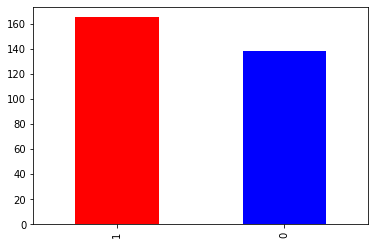

In [7]:
#Let's visualize this
df['target'].value_counts().plot(kind='bar',color=['red','blue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#let's check, do we have any null/missing values in our dataset or not?
df.isna().sum() # isna()=isnull() , you can use either method for it

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Describe your dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Heat disease frequency with Sex/Gender
df.sex.value_counts() # out of 303 observation/example 207 are male and 96 are female 

1    207
0     96
Name: sex, dtype: int64

In [12]:
#Let's breakdown this using the pandas crosstab method
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


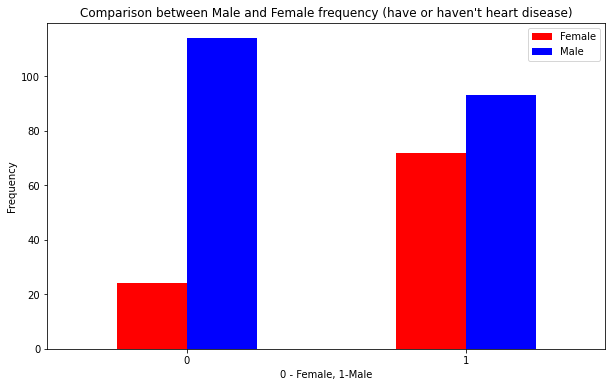

In [13]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',color=['red','blue'], figsize=(10,6))
plt.xlabel('0 - Female, 1-Male')
plt.ylabel('Frequency')
plt.title('Comparison between Male and Female frequency (have or haven\'t heart disease)')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

#### AS you can see there are more female who is having heart disease compare to male. 

In [14]:
df.thalach.value_counts() #Let's check how many people fall under maximum heart rate disease

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

(30.0, 80.0)

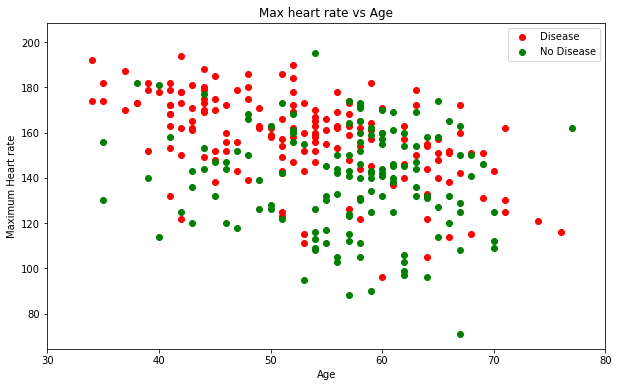

In [15]:
plt.figure(figsize=(10,6))

#Max heart rate with the positve (have heart disease)
plt.scatter(df['age'].where(df['target']==1),
           df['thalach'].where(df['target']==1),
           color='red')

#Max heart rate with the negative(Haven't heart disease)
plt.scatter(df['age'].where(df['target']==0),
           df['thalach'].where(df['target']==0),
           color = 'green')

plt.xlabel('Age')
plt.ylabel('Maximum Heart rate')
plt.title('Max heart rate vs Age')
plt.legend(['Disease','No Disease'])
plt.xlim((30,80))

### When the person get older, his/her heart rate decrease

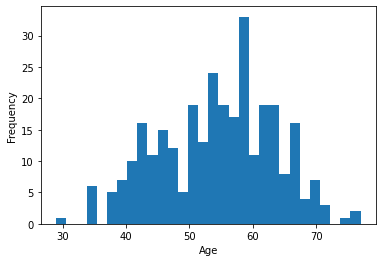

In [16]:
#Create a distribution with person Age
df.age.plot.hist(bins=30)
plt.xlabel('Age');

### As you see most person age belongs to between 50 to 60. it's a type of normal distribution

# Heart disease frequency with Chest pain (CP):
cp: chest pain type
1. Value 1: typical angina
2. Value 2: atypical angina
3. Value 3: non-anginal pain
4. Value 4: asymptomatic

In [17]:
pd.crosstab(df['cp'],df.target,rownames=['Chest Pain'],margins=True)

target,0,1,All
Chest Pain,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


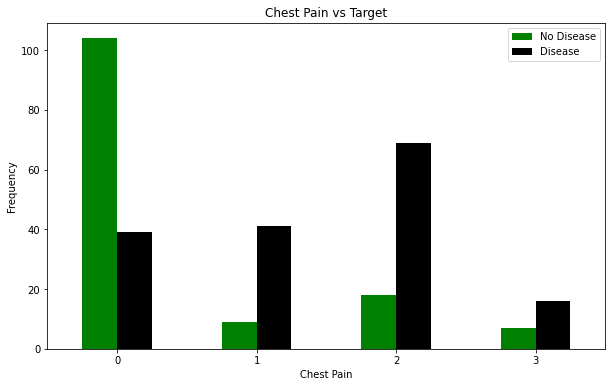

In [18]:
pd.crosstab(df['cp'],df.target).plot(kind='bar',figsize=(10,6),
                                    color = ['green','black'])
plt.xlabel('Chest Pain')
plt.ylabel('Frequency')
plt.title("Chest Pain vs Target")
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

### Correlation : if our target/dependent/outcome variable is strong positive or negative with independent/feature varialbe or not

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


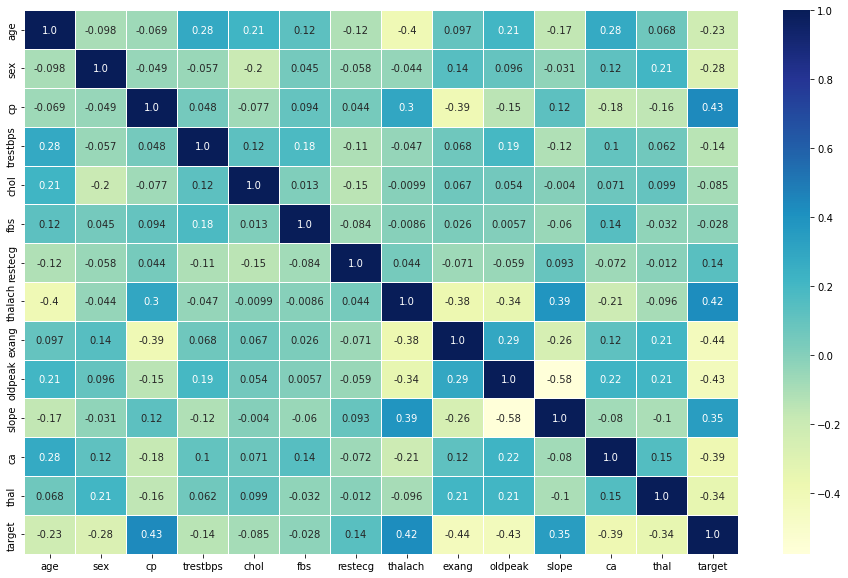

In [20]:
#let's visualize it 
corr = df.corr()
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr,
                 linewidths=0.5,
                fmt='0.2',cbar=True, annot=True, cmap="YlGnBu")

## Modeling

In [21]:

from IPython.display import Image
# from IPython.terminal
# get the image
Image(url="https://scikit-learn.org/stable/_static/ml_map.png", width=900, height=900)

In [22]:
#Defining the feature and target variable for machine learning model :
# X : features/Independent
# y : target/Dependent

X = df.drop(columns='target')
y = df.target

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
#Split the data into train and test
np.random.seed(42) # setting the random seed so when we run this cell more than once so data will be the same

#splitting the data :
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)


In [25]:
train_X.shape, test_X.shape # spllitting 80% of test and 20% of train

((242, 13), (61, 13))

Now we have splitted our data into training and testing
1. Use machine learning model to find the pattern and train the data
2. Use macine learning model to use the pattern and test the data
3. We are gonna to use below model to train our data
  1. Logistic Regression
  2. KNeighbours
  3. Random Forest 

In [26]:
# Let's create a model dictionary which we are gonna to use
models = {'Logistic Regression' : LogisticRegression(),
         'KNeighbors': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

In [27]:
# Use the function for fitting the data into models and getting the score on test data

def fit_and_score(models, train_X, test_X, train_y, test_y):
    """
    We will use the method for fitting and scoring our data.
    models : models dictionary
    train_X : Training dataset (No labels)
    test_X : testing dataset( NO labels)
    train_y : training labels
    test_y : testing labels
    return : model_score dictionary
    """
    np.random.seed(42)
    #create an empty dictionary for model score
    models_score = {}
    #Iterating the models using for loops
    for model_name, model in models.items():
        #fit the models with data
        model.fit(train_X, train_y)
        #evaluate the models and append it's result to models_score dictionary
        
        models_score[model_name] = model.score(test_X, test_y)
    return models_score

In [28]:
score = fit_and_score(models, train_X, test_X,train_y, test_y)
score

{'Logistic Regression': 0.8852459016393442,
 'KNeighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

so we got our accuracy score and we come to conclusion that Logistic Regression is performing better than other two models
because the accuracy is 88% but we need 95% accuracy let's dive in some more work and accomplish this goal as well.
Please bear with me until we didn't uncover the hidden insight.

In [29]:
#Let's visualize out accuracy socre 
model_score = pd.DataFrame(score, index=['accuracy']).T
model_score

,accuracy
Logistic Regression,0.885246
KNeighbors,0.688525
Random Forest,0.836066


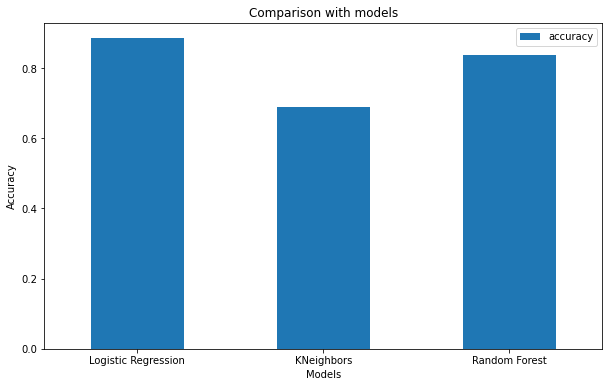

In [30]:
model_score.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0);
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title("Comparison with models");

## Improving our model using manual hyperparameter : n_neighbors
So far, we have trained our data, now we want to improve our KNeighbor (KNN) accuracy score. how can we do that?

Hyperparameter Tuning, Let's dive into it

In [31]:
n_neighbors = range(1,21)
test_score = []
train_score = []
for i in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(train_X, train_y)
    test_score.append(KNN.score(test_X,test_y))
    train_score.append(KNN.score(train_X, train_y))


In [32]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum accuracy on Test data is : 75.41%


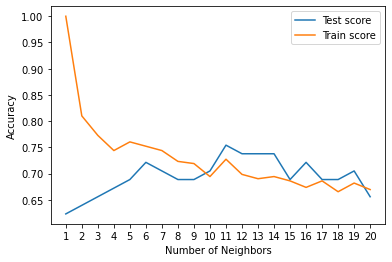

In [33]:
plt.plot(n_neighbors, test_score, label='Test score',)
plt.plot(n_neighbors, train_score, label='Train score')
plt.xticks(np.arange(1,21))
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()

print(f'Maximum accuracy on Test data is : {max(test_score)*100:.2f}%')

## Improving our model using Hyperparameter : RandomizedSearchCV

we know that, we tried to improve KNN model but it could reach to 95% accuracy so we will leave it now and try to work on 
Random forest and Logistic Regression model. Tuning the parameter so will get better result

In [34]:
lr_param = {'C':np.logspace(-4,4,20),
           'solver':['liblinear'],
           'max_iter':np.arange(50,300,50)}

rf_param = {"n_estimators":[100,200,250,300],
           "criterion":["gini", "entropy", "log_loss"],
           'max_leaf_nodes':[5,10,15,20,50,100],
           'max_depth':[None,3,5,10]}

In [35]:
#we have fed the data into our hyperparamter and now we will use the RandomizedSearchCV
#setting the seed
np.random.seed(42)

#Logistic regresson 
lr_rs = RandomizedSearchCV(estimator = LogisticRegression(),
                          param_distributions=lr_param,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#fitting the hyperparameter 
lr_rs.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': array([ 50, 100, 150, 200, 250]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
#Finding the best paramter for it
lr_rs.best_params_

{'solver': 'liblinear', 'max_iter': 250, 'C': 0.23357214690901212}

In [37]:
# evaluting the model 
lr_rs.score(test_X, test_y)

0.8852459016393442

In [38]:
model_score

,accuracy
Logistic Regression,0.885246
KNeighbors,0.688525
Random Forest,0.836066


# As you can see we have tuned our model but still we are getting the same accuracy score for Logistic regression 


In [39]:
#Now do the same for the Random Forest and let's see if it will improve the accuracy after hyperparameter tuning or not

In [40]:
#setting the seed
np.random.seed(42)

rfc_rs = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_param,
                           cv=5,
                           n_iter=20,
                           verbose = True)

#fitting the model
rfc_rs.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_leaf_nodes': [5, 10, 15, 20, 50,
                                                           100],
                                        'n_estimators': [100, 200, 250, 300]},
                   verbose=True)

In [41]:
#findind the best parameter/estimator
rfc_rs.best_params_

{'n_estimators': 200,
 'max_leaf_nodes': 100,
 'max_depth': 3,
 'criterion': 'gini'}

In [42]:
#evaluting for test data and getting the accuracy score
rfc_rs.score(test_X, test_y)

0.8688524590163934

In [43]:
model_score

,accuracy
Logistic Regression,0.885246
KNeighbors,0.688525
Random Forest,0.836066


#### wow that's awesome, we improved our Random Forest model using hyperparameter tuning. we had 83% accuracy but after tuning it we are having 86%

### Hyperparameter tuning with GridSearchCV
we have tunned our model with RandomizedSearchCV and our Logistic Regression provides best score so far, we will try the
same with GridSearchCv as well

In [44]:
lr_gc_param = {'C':np.logspace(-4,4,20),
           'solver':['liblinear'],
           'max_iter':np.arange(50,300,50)}

#set the random seed
np.random.seed(42)

lr_gsc = GridSearchCV(estimator=LogisticRegression(),
                     param_grid=lr_gc_param,
                     cv = 5,
                     verbose= True)

#fit the model
lr_gsc.fit(train_X, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': array([ 50, 100, 150, 200, 250]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
#finding the best parameter
lr_gsc.best_params_

{'C': 0.23357214690901212, 'max_iter': 50, 'solver': 'liblinear'}

In [46]:
#evaluating the result
lr_gsc.score(test_X, test_y)

0.8852459016393442

In [47]:
model_score


,accuracy
Logistic Regression,0.885246
KNeighbors,0.688525
Random Forest,0.836066


#### There is no improvement yet, we are still getting the same accuracy score.it's time to try it with different approach.
we have covered.
1. Hyperparameter Tuning
2. Cross validation 
3. accuracy score ( score)

We need to cover below.
1. Feature Selection
2. Precision score
3. Recall score
4. ROC curve
5. AUC (area under curve)
6. F1 score
7. Confusion matrix
8. Classification report

### Now it's time to evaluate our machine learning classification model, beyond accuracy.

In [48]:
#predicte the label using predict method
y_preds = lr_gsc.predict(test_X)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
test_y

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [51]:
confusion_matrix(test_y, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

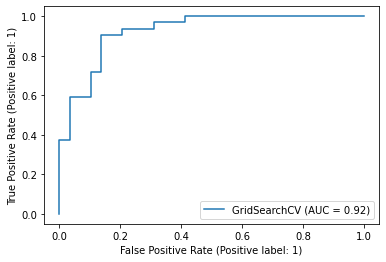

In [52]:
#plot the roc curve, best roc curve have AUC (Area under curve) value is 1.0
plot_roc_curve(estimator=lr_gsc,X = test_X, y = test_y);

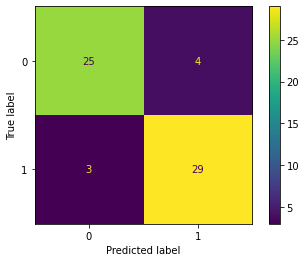

In [53]:
#plot the confusion matrix
plot_confusion_matrix(lr_gsc, test_X, test_y);

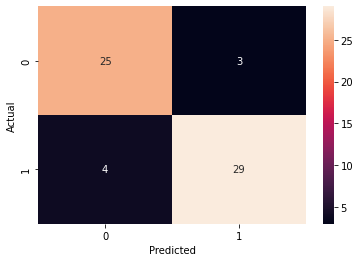

In [54]:
# let's plot the y_pred and test_y using seaborn method
sns.heatmap(confusion_matrix(y_preds, test_y),annot=True)
plt.ylabel("Actual")
plt.xlabel("Predicted");

1. True Positive : Predicated 1 and Actual is also 1 : above 29
2. False Positive : Predicated 0 and Actual is also 0 : Above 25
3. False Positive : Predicated 1 and Actual is 0 : Above 3 ( The preson didn't have heart disease but model predict it was)
4. False Negative : Predicated 0 and Actual is 1 : Above 4 ( The person did have heart disease but model predict it wasn't)
        

In [55]:
print(classification_report(test_y, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



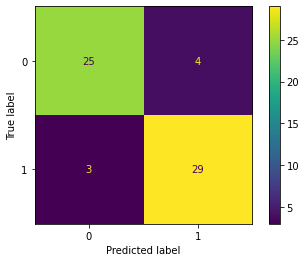

In [56]:
cm = ConfusionMatrixDisplay(confusion_matrix(test_y, y_preds))
cm.plot();

### Now we will do the same using cross validation score

In [57]:
#best parameter for gridsearchcv for logistic regression 
lr_gsc.best_params_

{'C': 0.23357214690901212, 'max_iter': 50, 'solver': 'liblinear'}

In [58]:
#let's create logistic regression object again for cross validation 
clf = LogisticRegression(C= 0.23357214690901212,
                          max_iter=50,
                          solver='liblinear')



In [59]:
#Cross-validated accuracy

cross_acc = cross_val_score(clf,
                            X,
                            y,
                            cv = 5, 
                            scoring = 'accuracy')
cross_acc = cross_acc.mean()
cross_acc

0.8479781420765027

In [60]:
#Cross-validated recall

cross_recall = cross_val_score(clf,
                            X,
                            y,
                            cv = 5, 
                            scoring = 'recall')
cross_recall = cross_recall.mean()
cross_recall

0.9272727272727274

In [61]:
#Cross-validated precision
cross_precision = cross_val_score(clf,
                            X,
                            y,
                            cv = 5, 
                            scoring = 'precision')
cross_precision = cross_precision.mean()
cross_precision

0.8215873015873015

In [62]:
#Cross-validated f1

cross_f1 = cross_val_score(clf,
                            X,
                            y,
                            cv = 5, 
                            scoring = 'f1')
cross_f1 = cross_f1.mean()
cross_f1

0.8705403543192143

In [63]:
cross_val_df = pd.DataFrame({'Accuracy': cross_acc,
                             'Precison': cross_precision,
                             'Recall': cross_recall,
                              'F1': cross_f1
                            },
                              index=['Cross Validation Score'])
cross_val_df.T

,Cross Validation Score
Accuracy,0.847978
Precison,0.821587
Recall,0.927273
F1,0.870540


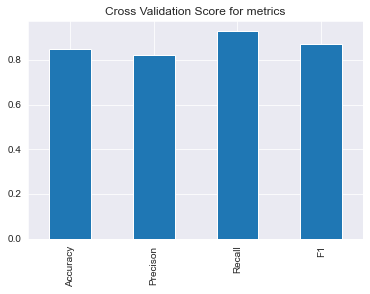

In [64]:
sns.set_style(style='darkgrid')
cross_val_df.T.plot.bar(title='Cross Validation Score for metrics',legend=False);

### Features Importance
We have a model, now let's check it out which features is best for it and how does it effect ?

In [65]:
lr_gsc.best_params_ #finding the best parametetrs for gridsearchcv

{'C': 0.23357214690901212, 'max_iter': 50, 'solver': 'liblinear'}

In [66]:
#let's again train our Logistic regression model to get which features is impacting the most/rare
clf = LogisticRegression(C=0.23357214690901212,
                         max_iter = 50,
                        solver = 'liblinear')

#fit the model
clf.fit(train_X, train_y)

LogisticRegression(C=0.23357214690901212, max_iter=50, solver='liblinear')

In [67]:
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490194,  0.02472938, -0.63120405, -0.57590939,
         0.47095134, -0.65165349, -0.69984206]])

In [68]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [69]:
#map columns with features
feat_col = dict(zip(df.columns,clf.coef_[0]))
feat_col

{'age': 0.003699220218693,
 'sex': -0.9042408909021112,
 'cp': 0.6747282639169492,
 'trestbps': -0.01161340193177967,
 'chol': -0.001703644306964925,
 'fbs': 0.047876883381437196,
 'restecg': 0.33490194499930287,
 'thalach': 0.024729383642503815,
 'exang': -0.6312040482089574,
 'oldpeak': -0.5759093926828687,
 'slope': 0.470951337854335,
 'ca': -0.651653485595126,
 'thal': -0.6998420593767237}

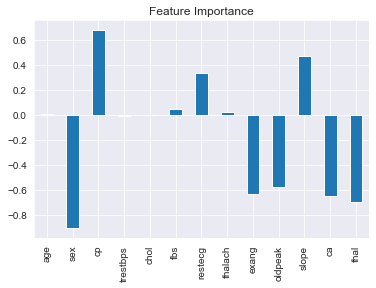

In [70]:
#visualize it to get better understanding 
feat_df = pd.DataFrame(feat_col,index=[0])
feat_df.T.plot.bar(legend=False, title='Feature Importance');

In [71]:
#as we can see 7-8 features are impacting to patients heart disease.
#sex, cp, restecg, exang, ddpeak, slope, ca, thal

In [72]:
pd.crosstab(df['ca'], df.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


## ca: number of major vessels (0-4) colored by flourosopy
As the ca value is increasing the patient have less chance to heart disease.

## Experimental
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?